Probabilidades de encontrar el electrón en diferentes posiciones:
{0.5: 0.274, 0.0: 0.253, 0.75: 0.253, 0.25: 0.244}


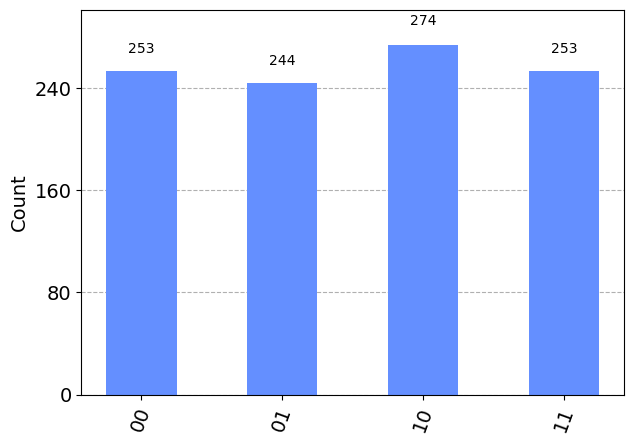

In [1]:
import numpy as np
from scipy.linalg import expm
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Parámetros del problema
L = 1  # Longitud del pozo de potencial
V0 = 1  # Potencial fuera del pozo de potencial
N = 4  # Número de puntos en los que dividimos el espacio

# Parámetros de la simulación
timesteps = 100  # Número de pasos de tiempo
dt = 0.1  # Incremento de tiempo

# Definición del Hamiltoniano para el sístema
def hamiltonian():
    # Definición de la matriz Hamiltoniana aquí
    # La matriz Hamiltoniana es para un muro de potencial:
    V0=1
    H = np.array([[V0, -1], [-1, V0]])
    return H

# Función para aplicar el operador de evolución temporal
def time_evolution_operator(circuit, dt):
    # Implementa la evolución temporal del sistema aquí
    H = hamiltonian()
    hbar=1 #Asumiendo hbar=1 por simplicidad
    U = expm(-1j * H * dt / hbar) #Forma del operador de evolución en el tiempo para la hamiltoniana específica.
    # Como siguiente objetivo para otros hamiltonianos, hay que usar the la descomposición de Trotter-Suzuki u otro metodo de integración númerica
    # Aquí se aplica el operador de evolución en el tiempo al circuito cuántico
    circuit.unitary(U, range(num_qubits))

    

# Crear circuito cuántico
num_qubits = int(np.log2(N))
qc = QuantumCircuit(num_qubits, num_qubits)

# Inicializar el estado del electrón en una superposición
qc.h(range(num_qubits))

# Evolución temporal
for _ in range(timesteps):
    time_evolution_operator(qc, dt)

# Medir los qubits
qc.measure(range(num_qubits), range(num_qubits))

n=1000
# Simular el circuito cuántico
simulator = Aer.get_backend('qasm_simulator')
result = transpile(qc, simulator)

# unir el circuito cuántico en un Qobj 
qobj=assemble(result)

# Correr el circuito cuántico simulado sobre el backend
results= simulator.run(result).result()

# recibir los conteos de las medidas
counts =results.get_counts(result)

# Calcular las probabilidades de encontrar el electrón en diferentes regiones del espacio
probabilities = {}
for key, value in counts.items():
    position = int(key, 2) * L / (2 ** num_qubits)
    if position in probabilities:
        probabilities[position] += value / n
    else:
        probabilities[position] = value / n

# Mostrar resultados
print("Probabilidades de encontrar el electrón en diferentes posiciones:")
print(probabilities)
plot_histogram(counts)